#  Task I

In [1]:
!pip install simpleaudio
!pip install moviepy

In [2]:
import pandas as pd
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip, AudioFileClip
from scipy.io.wavfile import write as write_wav

 You will explore the temporal dynamics of a time series by creating an audio-visual representation in which a synthetic sound
 evolves in correlation with the time series.

In [3]:
np.random.seed(42)

 **(a) Choose a 1-D time series of interest. This could be from any domain, such as: <br>
 • Stock prices, sensor readings, or experimental measurements <br>
 • Physiological signals (e.g., heart rate, EEG) <br>
 • Any synthetic or mathematical time series you generate**

In [4]:
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
prices = 100 + np.random.randn(100).cumsum()
stock_ts = pd.Series(prices, index=dates)

print("Sample Stock Price Time Series:")
display(stock_ts.head())

Sample Stock Price Time Series:


,0
2023-01-01,100.496714
2023-01-02,100.358450
2023-01-03,101.006138
2023-01-04,102.529168
2023-01-05,102.295015


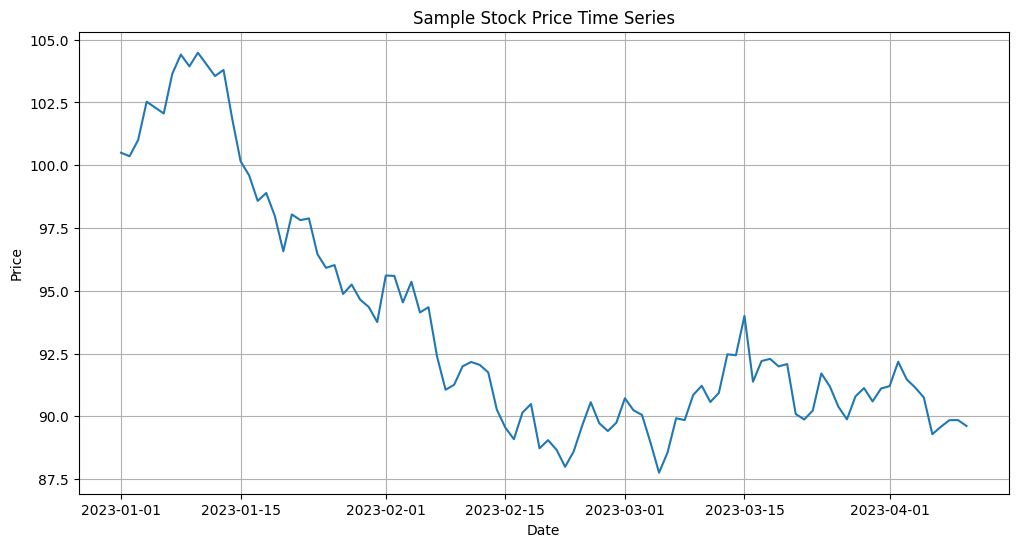

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(stock_ts)
plt.title('Sample Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**(b) Animation Generation**

 • Create an animation that visually shows the temporal unfolding of the time series.

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Animated Stock Price Time Series')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.grid(True)

line, = ax.plot([], [], lw=2)

ax.set_xlim(stock_ts.index.min(), stock_ts.index.max())
ax.set_ylim(stock_ts.min() * 0.95, stock_ts.max() * 1.05)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(stock_ts.index[:frame], stock_ts.values[:frame])
    return line,

animation = FuncAnimation(fig, update, frames=len(stock_ts), init_func=init, blit=True, interval=100)

# Save the animation as an MP4 file
output_filename = 'stock_ts_animation.mp4'
animation.save(output_filename, writer='ffmpeg')

print(f"Animation saved to '{output_filename}'. You can download this file.")

HTML(animation.to_jshtml())

plt.close(fig)

Animation saved to 'stock_ts_animation.mp4'. You can download this file.


 • Add a synthetic sound (e.g., a sine wave, noise, or other waveform) whose audible feature (e.g., pitch, amplitude, timbre)
 varies in a temporally correlated fashion with a chosen aspect of the time series (e.g., magnitude, derivative, or local variance).

In [7]:
normalized_ts = (stock_ts - stock_ts.min()) / (stock_ts.max() - stock_ts.min())
min_freq = 200
max_freq = 1000
frequencies = min_freq + normalized_ts * (max_freq - min_freq)

# Generate audio
sample_rate = 44100
duration_per_point = 0.1

audio_data = np.array([], dtype=np.int16)

for freq in frequencies:
    t = np.linspace(0., duration_per_point, int(sample_rate * duration_per_point))
    amplitude = np.iinfo(np.int16).max * 0.5
    segment = amplitude * np.sin(2. * np.pi * freq * t)
    audio_data = np.append(audio_data, segment.astype(np.int16))

# Save the audio to a WAV file
output_filename = 'stock_ts_audio.wav'
write_wav(output_filename, sample_rate, audio_data)

print(f"Audio saved to '{output_filename}'. You can download this file to listen to the audio.")

Audio saved to 'stock_ts_audio.wav'. You can download this file to listen to the audio.


The sound generated is a synthetic tone (specifically, a sine wave) whose pitch changes over time. Here's how it's formed and related to the stock dataset:

1.  **Normalization:** The stock price data (`stock_ts`) is first normalized. This means the prices, which can be any range of values, are scaled to a consistent range between 0 and 1. This is important for mapping the data to sound parameters, which often have specific valid ranges (like frequencies).

2.  **Mapping to Frequency:** The normalized stock prices are then mapped to a range of audible frequencies. In this case, the normalized values (between 0 and 1) are scaled to frequencies between 200 Hz (low pitch) and 1000 Hz (high pitch). This means that lower stock prices will correspond to lower frequencies (lower pitches), and higher stock prices will correspond to higher frequencies (higher pitches).

3.  **Sine Wave Generation:** For each data point in the time series, a short segment of a sine wave is generated. The frequency of this sine wave segment is determined by the mapped frequency value for that specific data point.

4.  **Concatenation and Saving:** These short sine wave segments, each corresponding to a point in the time series and having a frequency based on the stock price at that point, are concatenated together to form the complete audio data. This combined data is then saved as a WAV file.

In essence, the sound's pitch is directly reflecting the movement of the stock price time series. As the stock price goes up, the pitch of the sound rises, and as the stock price goes down, the pitch of the sound falls. This creates an auditory representation of the temporal dynamics of the stock prices.

• Ensure that the audio and visual streams are synchronized.

In [8]:
# Load the video and audio clips
video_clip = VideoFileClip("stock_ts_animation.mp4")
audio_clip = AudioFileClip("stock_ts_audio.wav")

# Set the audio of the video clip to the audio clip
final_clip = video_clip.set_audio(audio_clip)

output_filename_synced = "stock_ts_synced.mp4"
final_clip.write_videofile(output_filename_synced, codec='libx264')

print(f"Synchronized video saved to '{output_filename_synced}'. You can download this file.")

# Close the clips
video_clip.close()
audio_clip.close()

Moviepy - Building video stock_ts_synced.mp4.
MoviePy - Writing audio in stock_ts_syncedTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video stock_ts_synced.mp4



Moviepy - Done !
Moviepy - video ready stock_ts_synced.mp4
Synchronized video saved to 'stock_ts_synced.mp4'. You can download this file.


Normalized Time Series and Frequencies

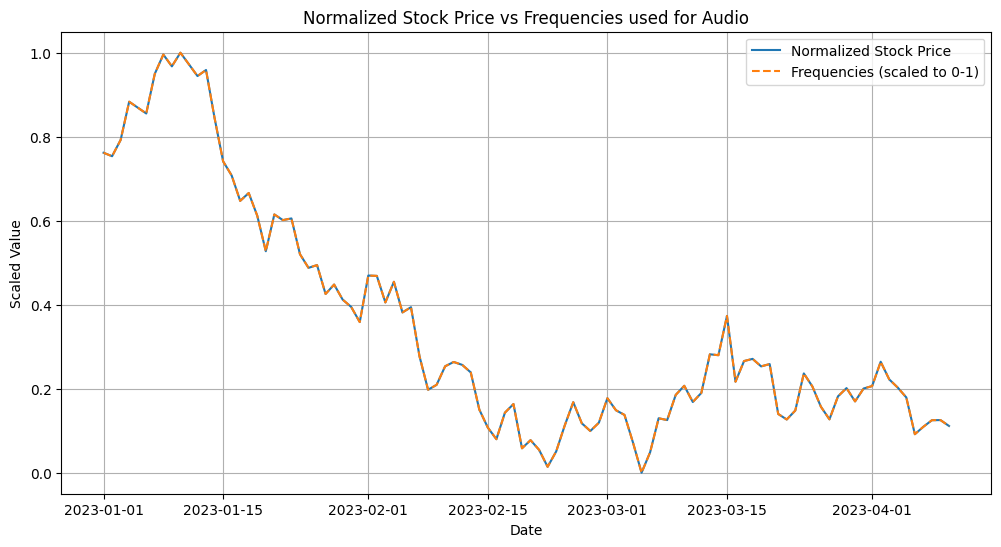

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(normalized_ts.index, normalized_ts.values, label='Normalized Stock Price')
plt.plot(frequencies.index, (frequencies - min_freq) / (max_freq - min_freq), label='Frequencies (scaled to 0-1)', linestyle='--')
plt.title('Normalized Stock Price vs Frequencies used for Audio')
plt.xlabel('Date')
plt.ylabel('Scaled Value')
plt.legend()
plt.grid(True)
plt.show()

Relationship between Normalized Stock Price and Frequencies (Scatter Plot)

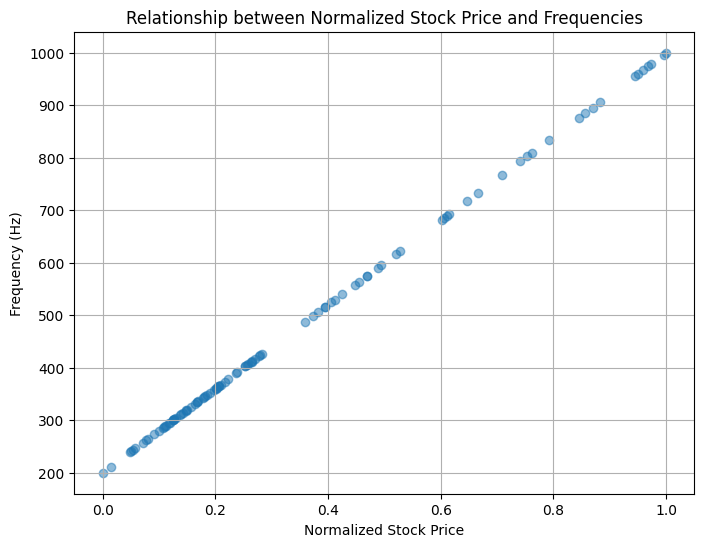

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(normalized_ts.values, frequencies.values, alpha=0.5)
plt.title('Relationship between Normalized Stock Price and Frequencies')
plt.xlabel('Normalized Stock Price')
plt.ylabel('Frequency (Hz)')
plt.grid(True)
plt.show()

Spectrogram of the generated audio

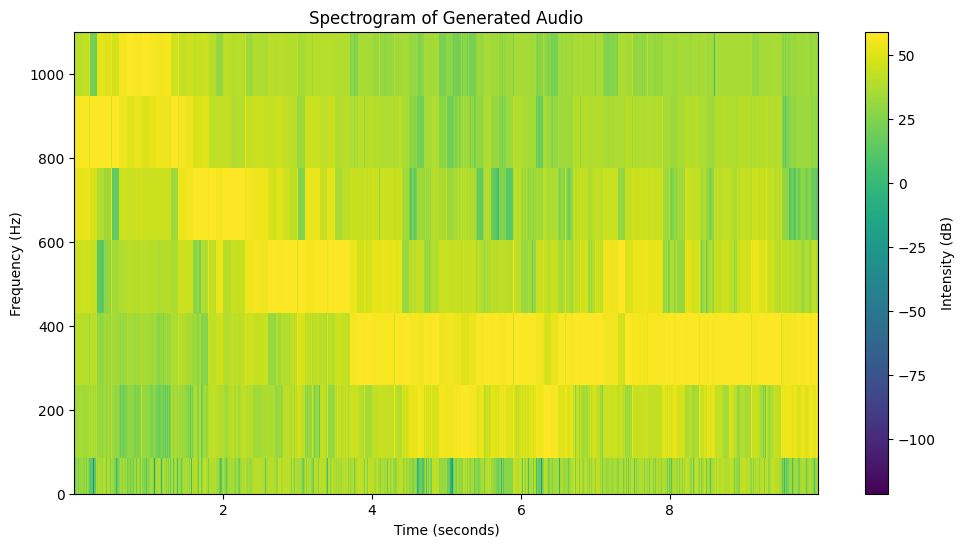

In [11]:
# Calculate the spectrogram
frequencies_spec, times_spec, spectrogram_data = spectrogram(audio_data, fs=sample_rate)

# Plot the spectrogram
plt.figure(figsize=(12, 6))
plt.pcolormesh(times_spec, frequencies_spec, 10 * np.log10(spectrogram_data))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.title('Spectrogram of Generated Audio')
plt.colorbar(label='Intensity (dB)')
plt.ylim([0, max_freq + 100]) # Limit the frequency range to be relevant
plt.show()